In [1]:
# import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from helpers import *
from implementations import *
# import SVM

### Prepare the data ###

Procedure: 1. normalize coding for missing values: check each feature, assign NaN to values > 95% percentile. --> 2. check each row, drop the rows where over 50% of the features are NaN. Also remove the corresponding y  --> 3. Check each columns, drop the feature where over 50% of the rows are NaN or std == 0. Record the index for test set. --> 4. Handling NaN values: check for categorical feature (record the index), assign NaN to mean for non-categorical and majority label for categorial. --> 5. One-hot encoding for categorical data. --> 6. Standardize (skip categorical 0-1 columns)  --> 7. Regard a datapoint having more than 30% of the features with Z-score>2.5 as outliers, remove from x and corresponding y. --> 8. Data Augmentation --> 9. PCA 

In [5]:
x_train, x_test, y_train, train_ids, test_ids = load_csv_data("./data/dataset_to_release", sub_sample=True)

In [3]:
print(x_train.shape)
print(y_train.shape)

(6563, 321)
(6563,)


In [4]:
# x_sub, y_sub = split_cross_validation(x_train, y_train, 10)
# np.shape(x_sub[0])

In [6]:
# thresholds for nans
row_nan = 0.6
feature_nan = 0.8
# threshold for categorical features
threshold_cat = 10
# threshold for outliers
z_threshold=2
feature_threshold=0.2

x_train_processed = x_train.copy()
y_train_processed = y_train.copy()

# transform y to 0-1 encoding
y_train_processed = process_y(y_train_processed)

# Uniform missing value encoding
# x_train_processed = normalize_nan(x_train_processed)
# Remove rows with too many nans
x_train_processed, y_train_processed = drop_rows(x_train_processed, y_train_processed, row_nan) # 0.55 remains 6101 rows
# x_train_processed.shape
# Remove features with too many nans
x_train_processed, nan_indices = drop_features(x_train_processed, feature_nan) # 0.5 remains 174 features
print(x_train_processed.shape)

# get categorical feature indices
cat_indices = check_categorical(x_train_processed, threshold_cat)
# handling remaining nans
x_train_processed = fillna(x_train_processed, cat_indices)
# One hot encoding for categorical features
x_train_processed = one_hot_encoding(x_train_processed, cat_indices)
x_train_processed = standardize(x_train_processed)
x_train_processed, y_train_processed = z_outlier_removal(x_train_processed, y_train_processed, z_threshold, feature_threshold)
x_train_processed.shape
# x_train_processed = add_bias(x_train_processed)


(6368, 200)


(6368, 586)

In [6]:
np.sum(y_train_processed==1)

550

In [7]:
print(x_train_processed.shape)
print(y_train_processed.shape)
print(np.sum(x_train_processed.std(axis=0) == 0))

(6368, 586)
(6368,)
0


In [8]:
# x_train_processed_orig = x_train.copy()
# x_train_processed_orig = fillna_with_mean(x_train_processed_orig, threshold=threshold_nan)
# x_train_processed_orig = standardize(x_train_processed_orig)
# x_train_processed_orig = polynomial_expansion_single(x_train_processed_orig, degree=2)
# x_train_processed_orig = standardize(x_train_processed_orig)
# x_train_processed_orig = add_bias(x_train_processed_orig)
# # add a column of ones
# y_train_processed_orig = y_train.copy()
# y_train_processed_orig = process_y(y_train_processed_orig)
# print(np.isnan(x_train_processed_orig).any())

In [9]:
# print(x_train_processed_orig.shape)
# print(y_train_processed_orig.shape)

In [10]:
# ## PCA feature selection 
# pre_train_data = x_train_processed.copy()

# x_pca, eig_vec, eig_val,weight = pca(pre_train_data, 200)
# print(weight)

In [11]:
# x_pca.shape

In [12]:
# cummulation = np.cumsum(weight)
## cummulation
# plt.plot(cummulation)

In [13]:
# x_pca.shape

### Experiment ###

In [14]:
# ## linear regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# # x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = mean_square_error_gd(y_t, x_t, initial_w, max_iters=500, gamma=0.01)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred > y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [15]:
# x_train_processed.shape

In [16]:
# # logistic regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = logistic_regression(y_t, x_t, initial_w, max_iters=500, gamma=0.1)
# y_pred = sigmoid(x_v @ w)
# y_pred = (y_pred >= 0.7).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [17]:
# # logistic regression
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = reg_logistic_regression(y_t, x_t, lambda_=0.1, initial_w=initial_w, max_iters=500, gamma=0.15)
# y_pred = (x_v @ w >= 0.75).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [18]:
# # ridge regression using all the features except for those having NaN values over 50% ##
# x_t, y_t, x_v, y_v = split_data(add_bias(x_train_processed), y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# w, loss = ridge_regression(y_t, x_t, lambda_=0.01)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred > y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

#### Hinge loss gradient descent

In [19]:
# accs = []
# f1 = []
# for i in range(10):
#     x_t, y_t, x_v, y_v = split_data(x_train_processed, y_train_processed, 0.9)
#     x_t, y_t = data_augmentation(x_t, y_t)
#     initial_w = np.random.randn(x_t.shape[1]) * 0.01
#     w, loss = hinge_regression(y_t, x_t, initial_w, lambda_=0.1, max_iters=500, gamma=0.01)
#     y_pred = ((x_v @ w) > 0.5).astype(int)
#     accs.append(predict_acc_pure(y_pred, y_v))
#     f1.append(predict_f1_pure(y_pred, y_v))
# print("Final accuracy score is: ", np.mean(accs))
# print("Final f1 score is: ", np.mean(f1))

In [20]:
# import sklearn.svm as svm
# cls = svm.SVC(C=50, kernel='rbf')
# x_t, y_t, x_v, y_v = split_data(x_train_processed_hinge, y_train_processed_hinge, 0.9)
# cls.fit(x_t, y_t)
# y_pred = cls.predict(x_v)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

#### PCA

In [21]:
# ## linear regression using PCA feature selection ##
# x_pca_t = add_bias(x_pca)
# x_t, y_t, x_v, y_v = split_data(x_pca_t, y_train_processed, 0.9)
# # x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_pca_t.shape[1]) * 0.01
# w, loss = mean_square_error_gd(y_t, x_t, initial_w, max_iters = 500, gamma=0.05)
# y_pred = x_v @ w
# y_pred_mean = np.mean(y_pred)
# y_pred = (y_pred >= y_pred_mean).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [22]:
# # logistic regression using pca feature selection #
# x_pca_t = add_bias(x_pca)
# x_t, y_t, x_v, y_v = split_data(x_pca_t, y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_pca_t.shape[1]) * 0.01
# w, loss = logistic_regression(y_t, x_t, initial_w, max_iters=500, gamma=0.15)
# y_pred = sigmoid(x_v @ w)
# y_pred = (y_pred >= 0.7).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

In [23]:
# # logistic regression using pca feature selection #
# initial_w = np.random.randn(x_pca.shape[1]) * 0.01
# w, loss = reg_logistic_regression(y_train_processed, x_pca, lambda_=0.01, initial_w=initial_w, max_iters=100, gamma=0.15)
# predict_acc(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=0.85)
# predict_f1(x_train_processed_orig_pca, y_train_processed_orig, w, logistic=False, threshold=0.85)

In [24]:
# x_t, y_t, x_v, y_v = split_data(x_pca, y_train_processed, 0.9)
# x_t, y_t = data_augmentation(x_t, y_t)
# initial_w = np.random.randn(x_t.shape[1]) * 0.01
# w, loss = hinge_regression(y_t, x_t, initial_w, lambda_=0.3, max_iters=500, gamma=0.01)
# y_pred = ((x_v @ w) > 1).astype(int)
# predict_acc_pure(y_pred, y_v)
# predict_f1_pure(y_pred, y_v)

### Apply SVM to classification task

In [25]:
# w_svm, b_svm = SVM.gradient_descent(x_train_processed_orig_pca[:, 1:], y_train_processed_orig, epochs=500, lr=0.3)

In [26]:
# np.shape(x_train)

### Apply Neural Network ###

In [8]:
x_t, y_t, x_v, y_v = split_data(x_train_processed, y_train_processed, 0.8)
# x_t, y_t = data_augmentation(x_t, y_t)
# x_t, _, _, _= pca(x_t, 100)
nn = initialize_network(input_size=np.shape(x_t)[1], hidden_size1=40, hidden_size2=16, hidden_size3=10, output_size=1)
nn_trained = train(nn, x_t, y_t, learning_rate=0.005, epochs=15, batch_size=240)
y_pred = predict(nn_trained,x_v)
predict_acc_pure(y_pred, y_v)
predict_f1_pure(y_pred, y_v)

ValueError: shapes (240,) and (1,240) not aligned: 240 (dim 0) != 1 (dim 0)

In [28]:
y_t.mean()

0.08500196309383588

In [29]:
a2 = forward_propagation(nn_trained, x_v)[-1]
    
    
y_pred = (np.squeeze(a2) > 0).astype(int)
predict_acc_pure(y_pred, y_v)
predict_f1_pure(y_pred, y_v)


The Accuracy is: 0.0000
The F1 score is: 0.1682
The precision is: 0.0918
The recall is: 1.0000


0.16822429906542058

In [30]:
y_pred = predict(nn_trained,x_v)

In [31]:
y_v.mean()

0.09183673469387756

### Test NN ### 

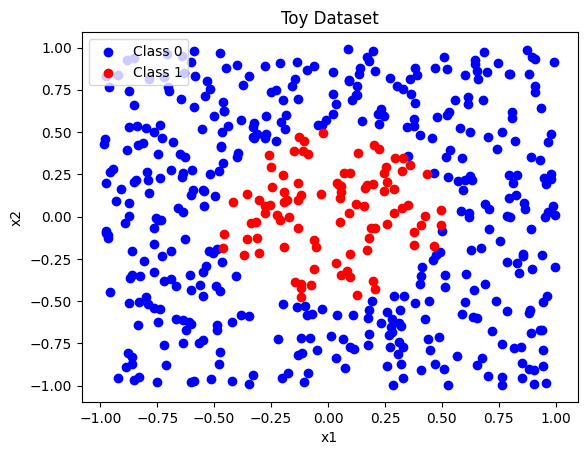

In [32]:
def generate_data(num_samples=500, radius=0.5):
    # Generate random 2D points
    x = np.random.rand(num_samples, 2) * 2 - 1 # Rescale to [-1, 1]
    
    # Create labels based on distance to the origin
    labels = (np.sum(x**2, axis=1) < radius**2).astype(int)
    
    return x, labels

x, y = generate_data()

# Visualization
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Toy Dataset')
plt.show()

In [33]:
nn = initialize_network(input_size=np.shape(x)[1], hidden_size1=10, hidden_size2=10, hidden_size3=4, output_size=1)
nn_trained = train(nn, x, y, learning_rate=0.0001, epochs=40, batch_size=200)
y_pred = predict(nn_trained,x)
predict_acc_pure(y_pred, y)
predict_f1_pure(y_pred, y)

Epoch: 0 Loss: 0.554140901035659
Epoch: 2 Loss: 0.6355115822676142
Epoch: 4 Loss: 0.5703803972660615
Epoch: 6 Loss: 0.538148358572958
Epoch: 8 Loss: 0.6037274295874099
Epoch: 10 Loss: 0.5935929089893998
Epoch: 12 Loss: 0.5377727988257001
Epoch: 14 Loss: 0.5528197762511157
Epoch: 16 Loss: 0.5266685407389036
Epoch: 18 Loss: 0.6114912648196452
Epoch: 20 Loss: 0.6243905797773407
Epoch: 22 Loss: 0.5553445897213269
Epoch: 24 Loss: 0.5752018005867288
Epoch: 26 Loss: 0.5991425648936147
Epoch: 28 Loss: 0.5570613615321734
Epoch: 30 Loss: 0.5951387318402769
Epoch: 32 Loss: 0.5971782551430359
Epoch: 34 Loss: 0.5107926032784098
Epoch: 36 Loss: 0.5418308481425692
Epoch: 38 Loss: 0.5648235199545646
The Accuracy is: 0.0020
The F1 score is: 0.0959
The precision is: 0.1346
The recall is: 0.0745


0.0958904109589041